# **Mall Customer Segmentation Data**

**Context:**

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content:**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement:**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

**Importing necessary libraries**

In [319]:
# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

**Data Exploration**

In [320]:
df = pd.read_csv('Mall_Customers.csv')

In [321]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [322]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [323]:
df.shape

(200, 5)

In [324]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [325]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [326]:
def first_step(name=''):
  df = pd.read_csv(name)
  print(df.head(3))
  print('____________________________________________________________________\n')
  print('Columns types are \n')
  print(df.dtypes)
  print('____________________________________________________________________\n')
  print('The shape of the data is {}'.format(df.shape))
  print('____________________________________________________________________\n')
  print('Data description: \n')
  print(df.describe())
  print('____________________________________________________________________\n')
  print('Null values equl to {}'.format(df.isnull().sum().sum()))
  print('And null values in each column:')
  print(df.isnull().sum())
  print('____________________________________________________________________\n')
  print('The correaltion between columns:\n')
  print(df.corr())


In [327]:
first_step('Mall_Customers.csv')

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
____________________________________________________________________

Columns types are 

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
____________________________________________________________________

The shape of the data is (200, 5)
____________________________________________________________________

Data description: 

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007  

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

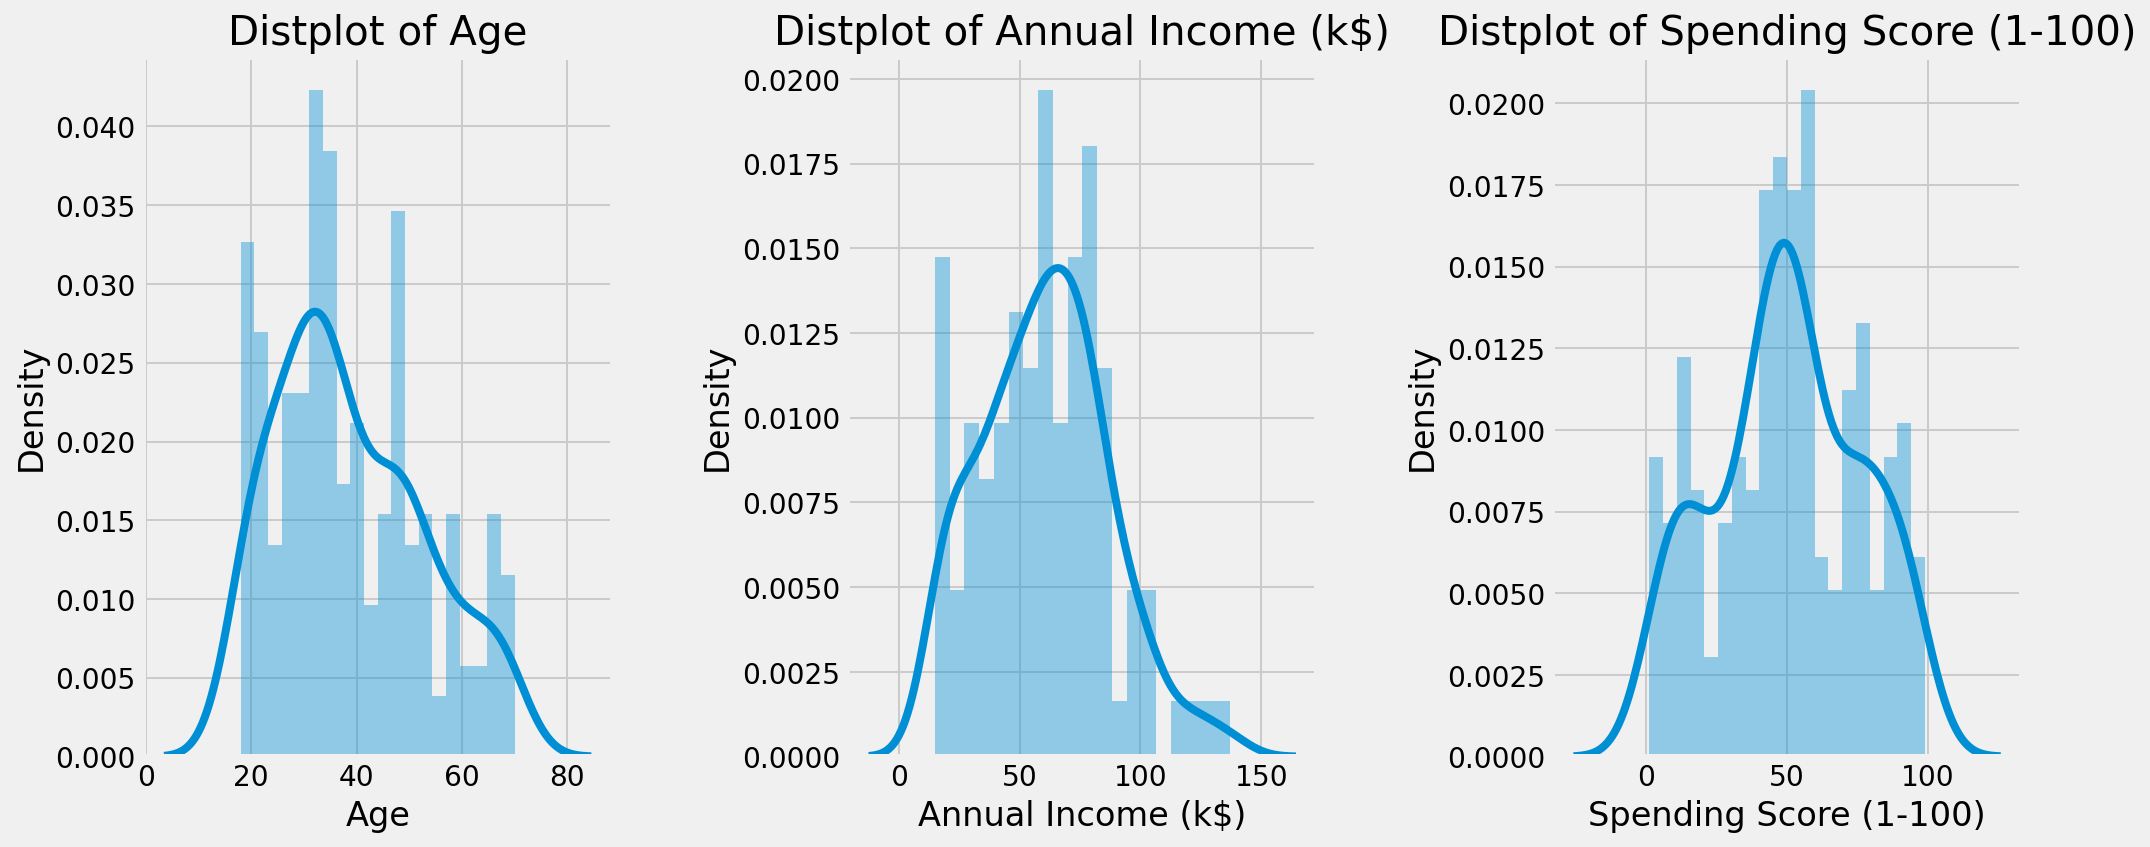

In [328]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

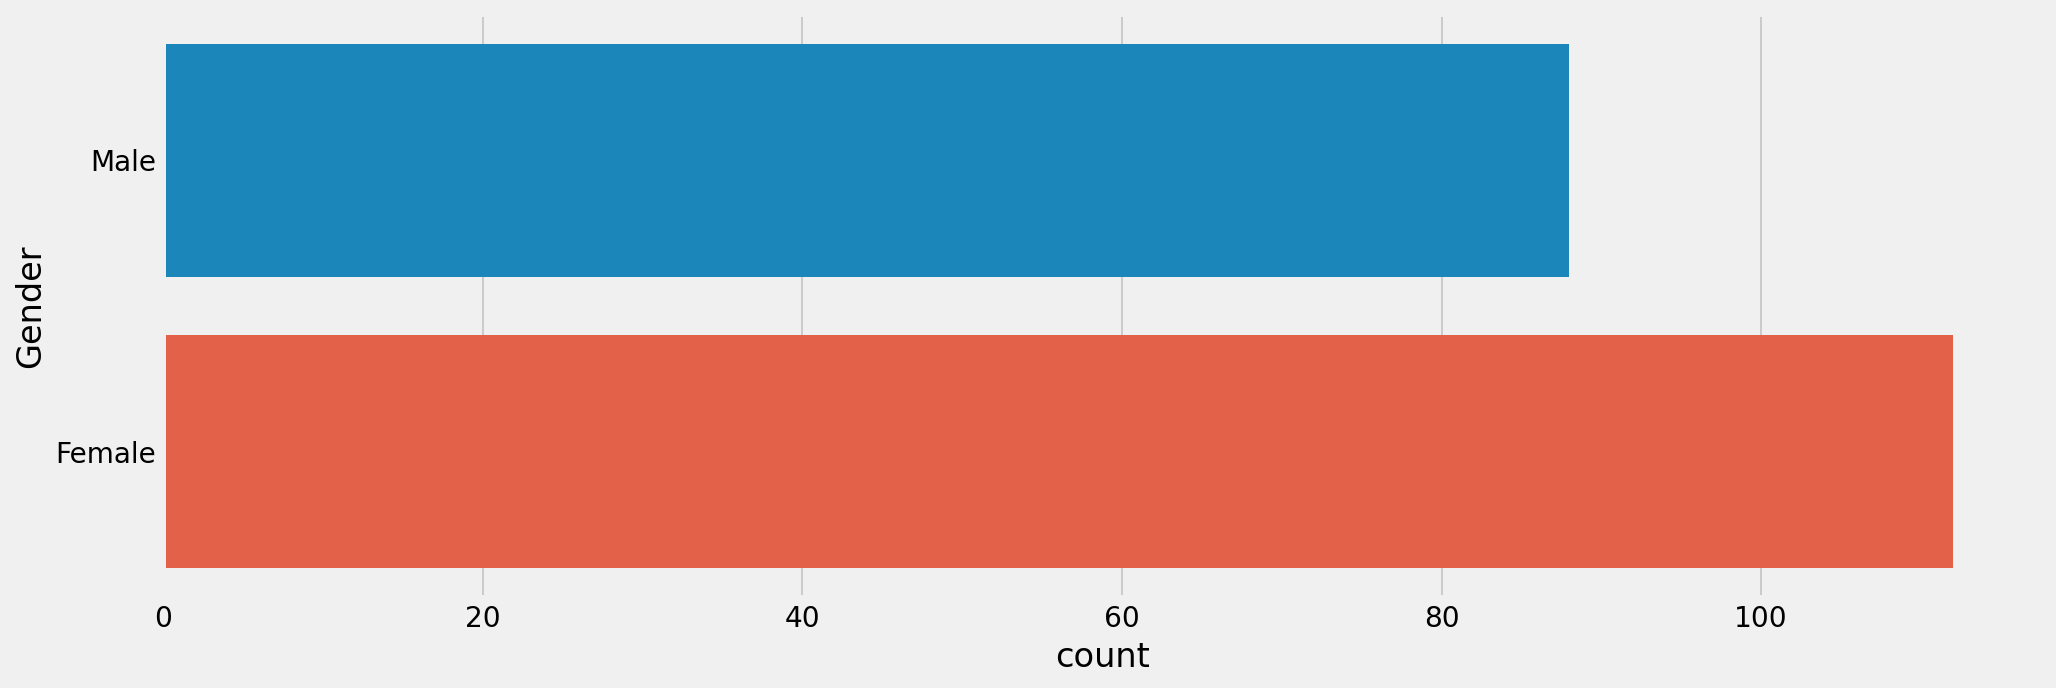

In [329]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

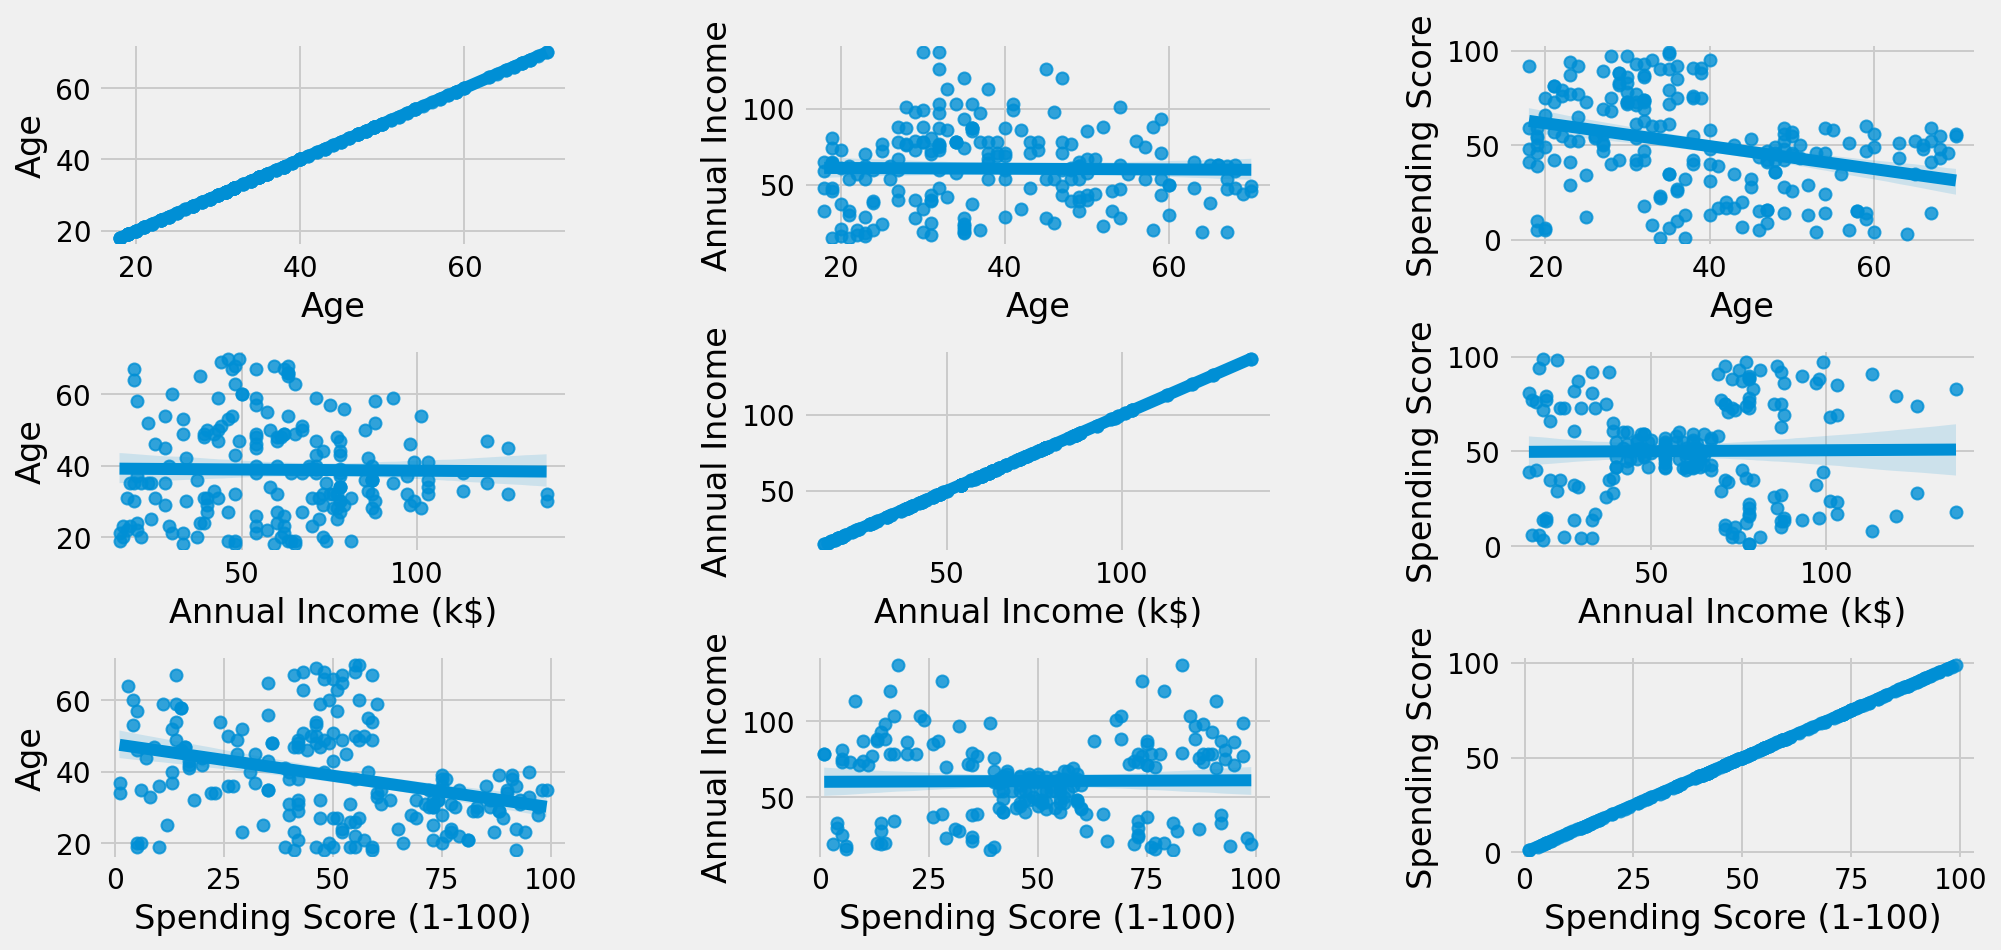

In [330]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

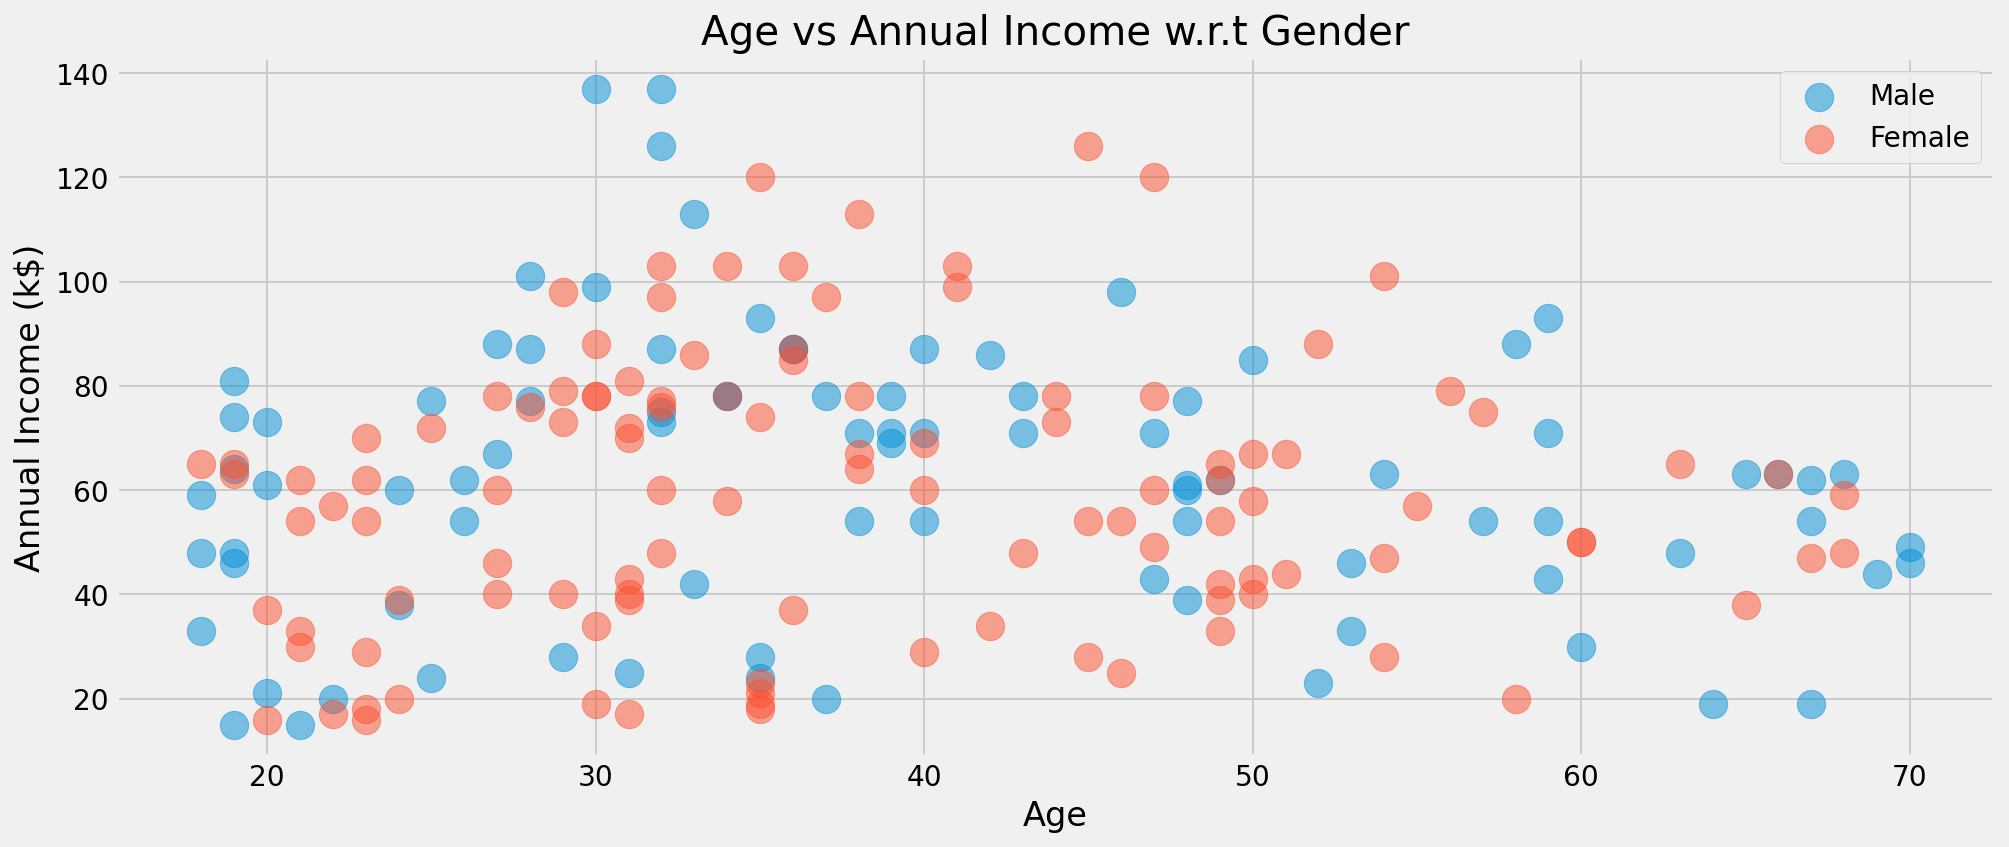

In [331]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

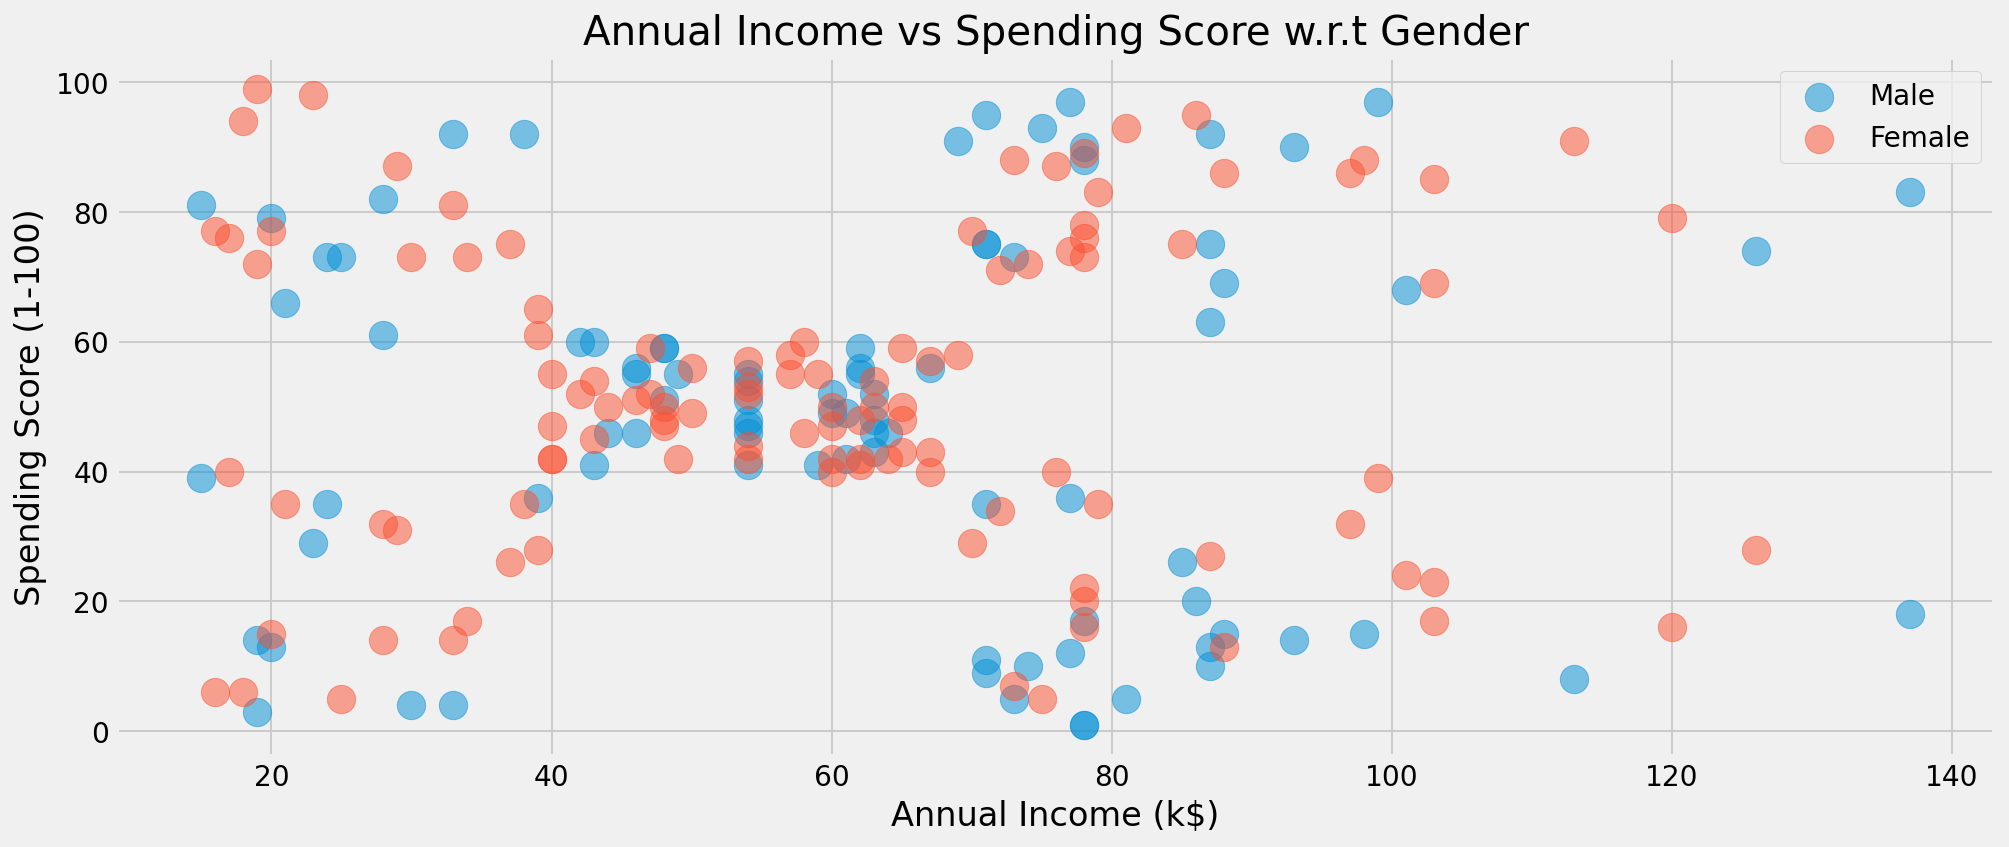

In [332]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

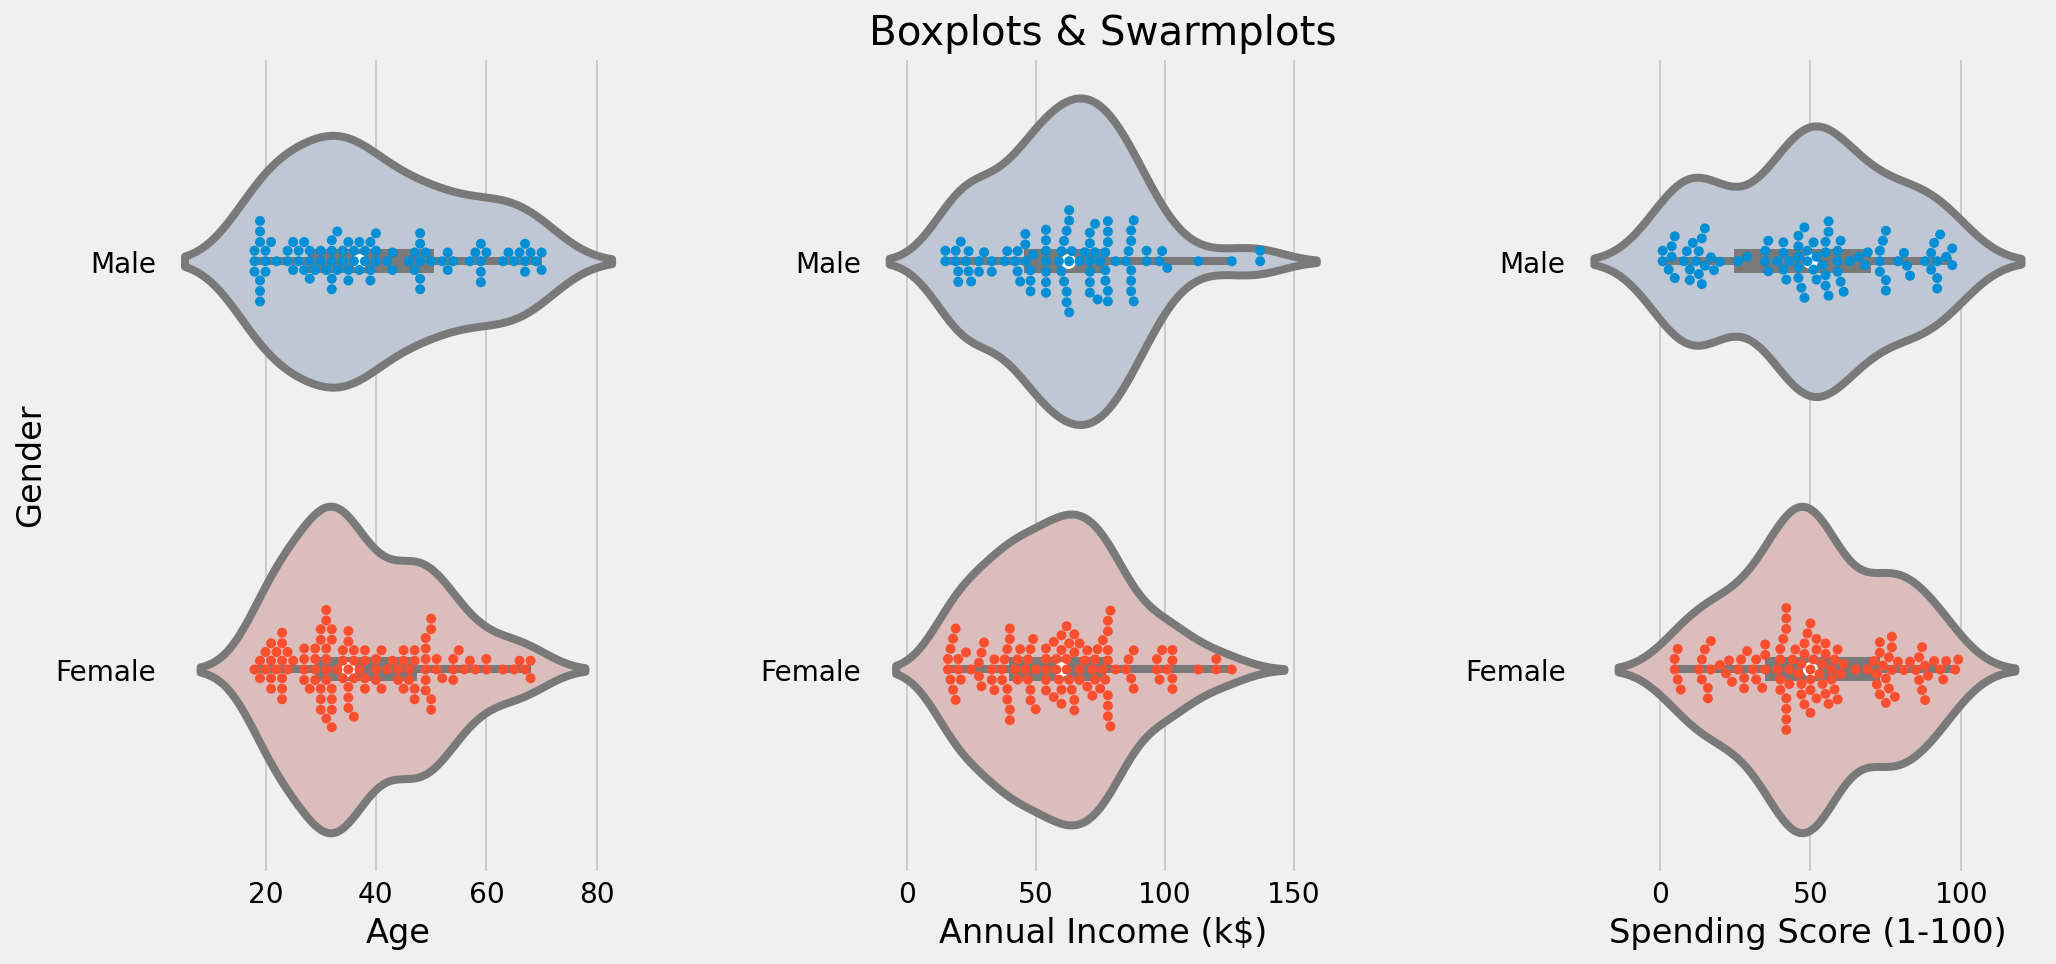

In [333]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

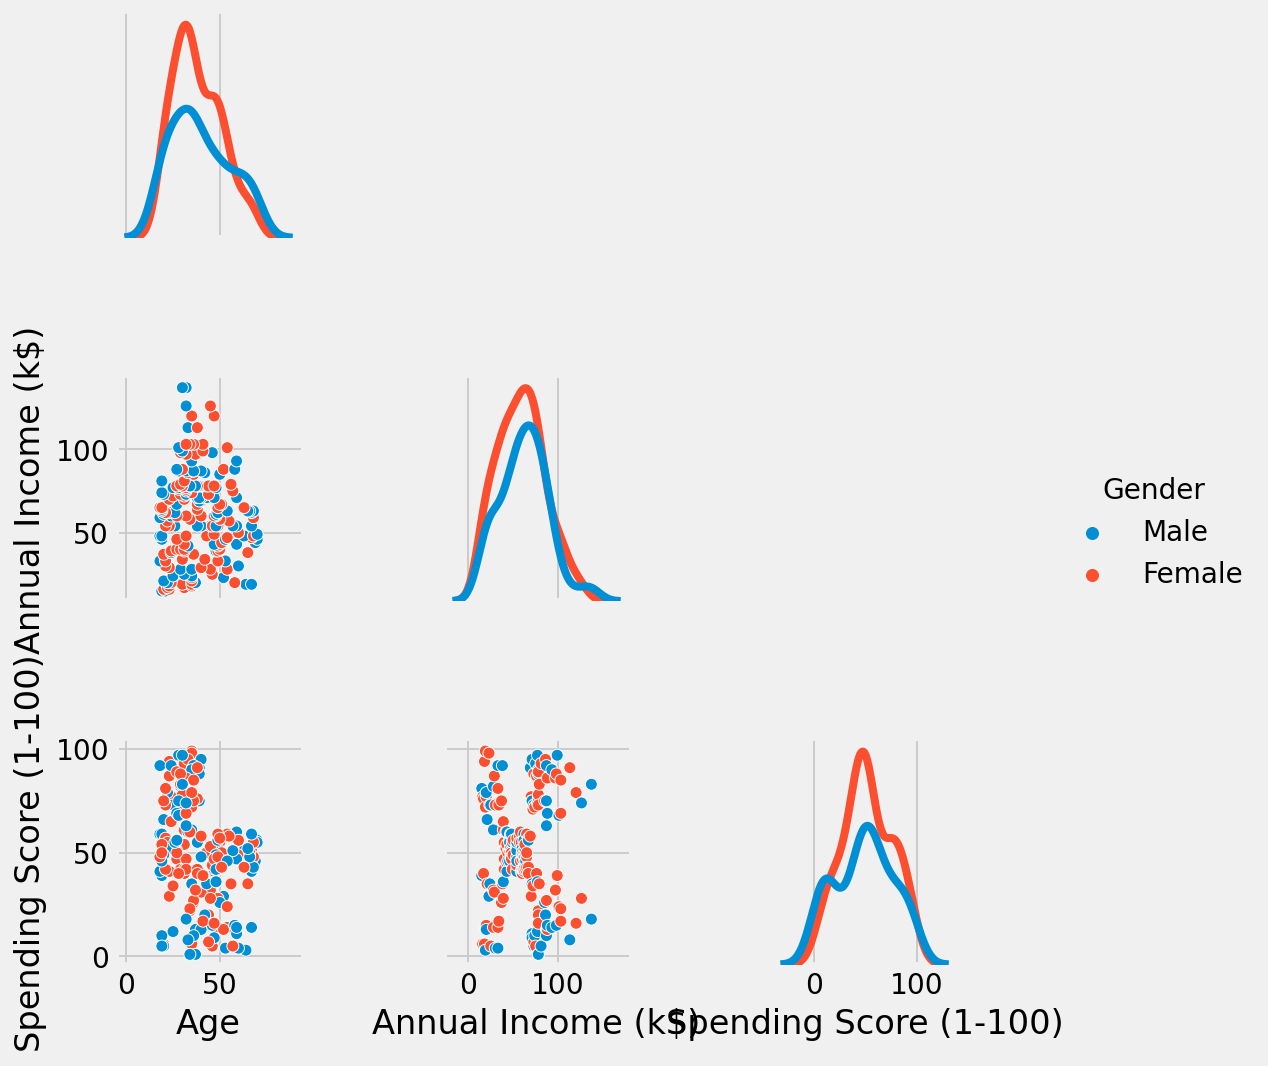

In [334]:
g = sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', corner=True, diag_kws=dict(fill=False))

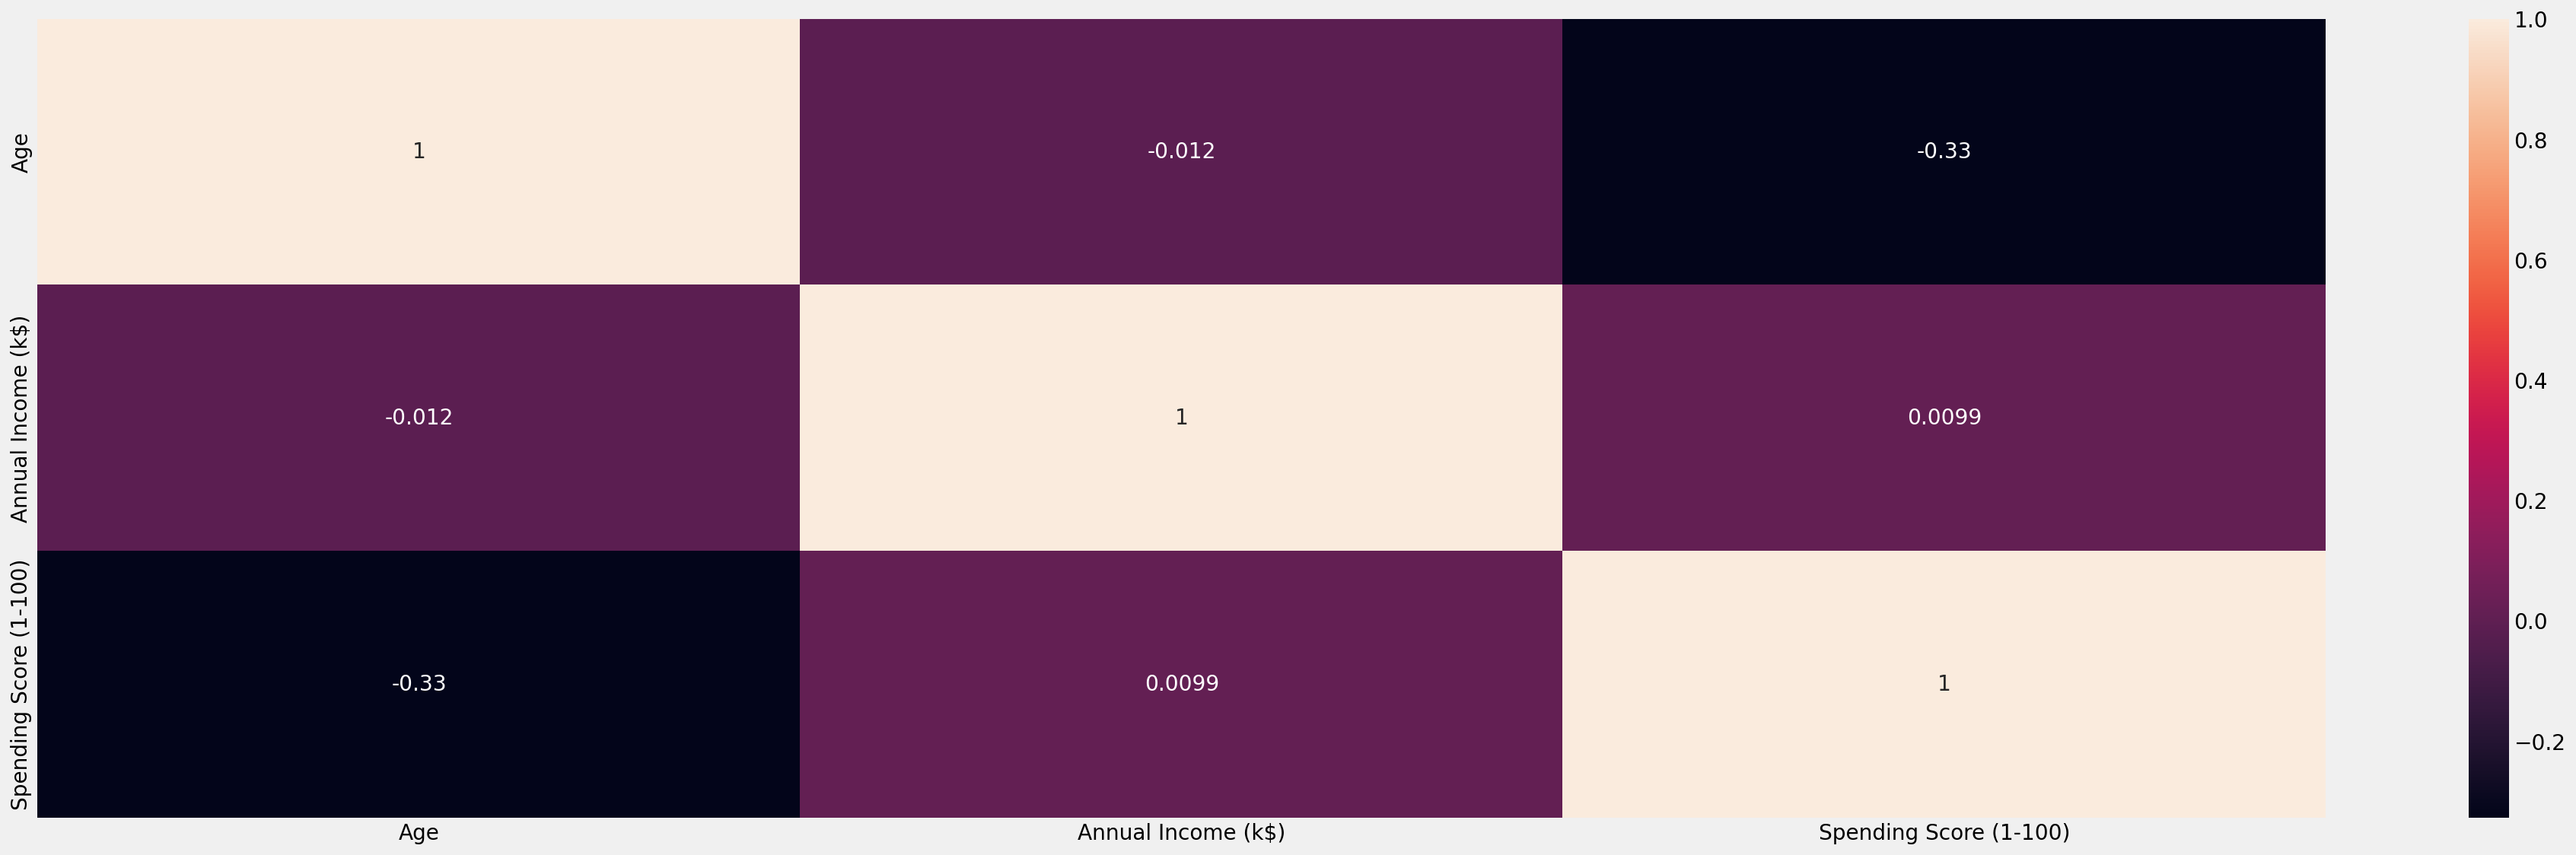

In [335]:
plt.figure(figsize=(30,9))
sns.heatmap(df.drop('CustomerID', axis=1).corr(),annot=True)

In [336]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [337]:
X= df.drop(['CustomerID','Gender'], axis=1)

In [338]:
from sklearn.preprocessing import MinMaxScaler
MM =MinMaxScaler()
X_scaled= MM.fit_transform(X)

In [339]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

df['gender']=gender_encoder.fit_transform(df['Gender'])

**Selecting N Clusters based on Inertia**

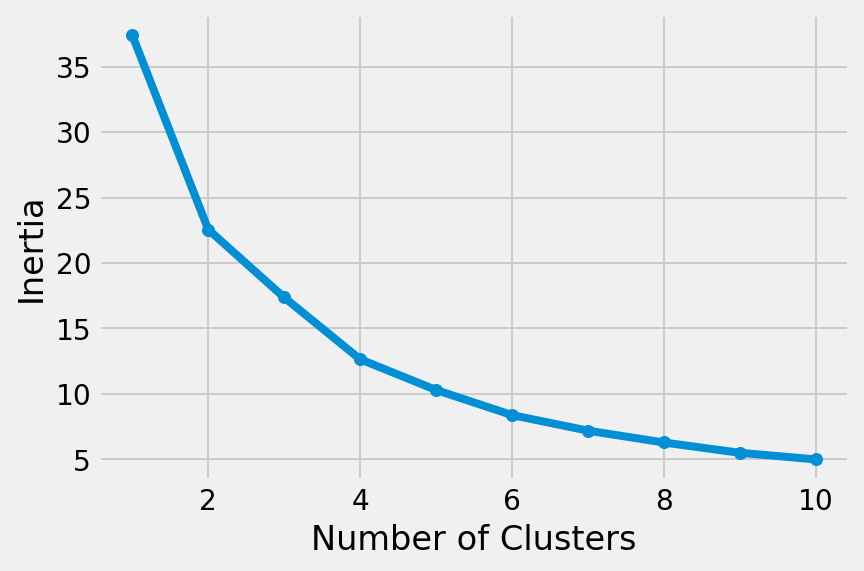

In [340]:
### BEGIN SOLUTION
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

**Clustering using K- means**

In [357]:
km = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
km.fit(X_scaled)

KMeans(algorithm='elkan', n_clusters=4, random_state=111)

In [358]:
df['Cluster_num']= km.predict(X_scaled)

In [359]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender,Cluster_num,Cluster_num_db,Cluster_num_ms
0,1,Male,19,15,39,1,0,0,0
1,2,Male,21,15,81,1,0,1,0
2,3,Female,20,16,6,0,0,2,0
3,4,Female,23,16,77,0,0,1,0
4,5,Female,31,17,40,0,0,1,0


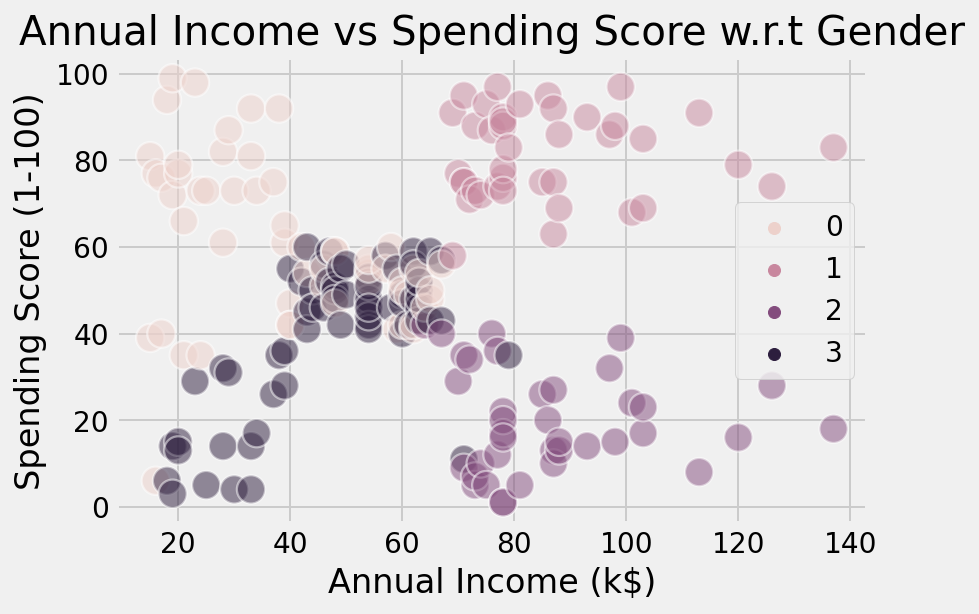

In [360]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df ,s = 200 , alpha = 0.5 , hue = df['Cluster_num'])
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [361]:
df['Cluster_num'].value_counts()

3    65
0    57
1    40
2    38
Name: Cluster_num, dtype: int64

**Clustering using DBSCAN**

In [346]:
from sklearn.cluster import DBSCAN
db= DBSCAN(eps=0.2, min_samples=1)
db.fit(X_scaled)

DBSCAN(eps=0.2, min_samples=1)

In [347]:
df['Cluster_num_db']= db.fit_predict(X_scaled)

In [348]:
df['Cluster_num_db'].value_counts()

1    195
3      2
0      1
2      1
4      1
Name: Cluster_num_db, dtype: int64

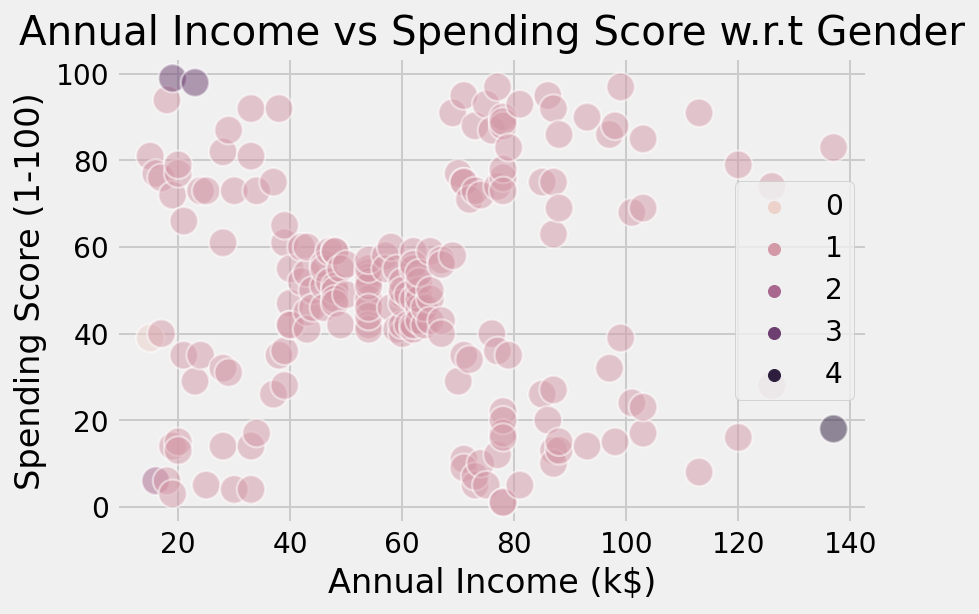

In [349]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df ,s = 200 , alpha = 0.5 , hue = df['Cluster_num_db'])
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Clustering using MeanShift**

In [350]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.3)
ms.fit(X_scaled)

MeanShift(bandwidth=0.3)

In [351]:
df['Cluster_num_ms']= ms.predict(X_scaled)

In [352]:
df['Cluster_num_ms'].value_counts()

0    61
1    56
2    42
3    41
Name: Cluster_num_ms, dtype: int64

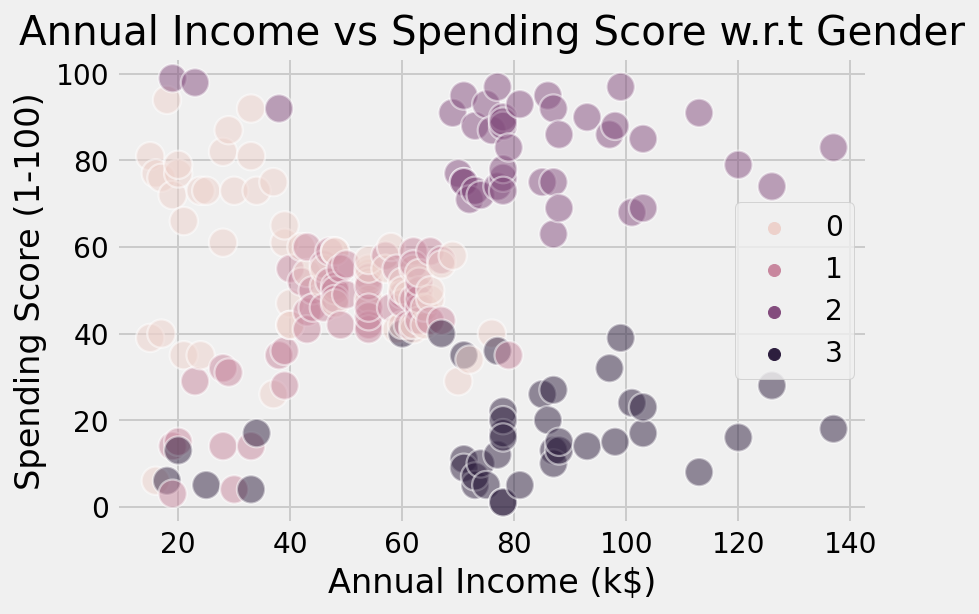

In [353]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df ,s = 200 , alpha = 0.5 , hue = df['Cluster_num_ms'])
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Exploring each observation cluster number:**

In [ ]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender,Cluster_num,Cluster_num_db,Cluster_num_ms
0,1,Male,19,15,39,1,3,0,0
1,2,Male,21,15,81,1,3,1,0
2,3,Female,20,16,6,0,3,2,0
3,4,Female,23,16,77,0,3,1,0


In [366]:
labels = km.labels_
centroids = km.cluster_centers_

In [372]:
import plotly.graph_objs as go
import numpy as np
import plotly as py

In [373]:
df['label3'] =  labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)